In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

In [8]:
#df.describe()
df.describe().transpose() #for more organization

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
c=df.corr()
c

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  1
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [12]:
df.drop(df.index[581], inplace=True)

### visualisation

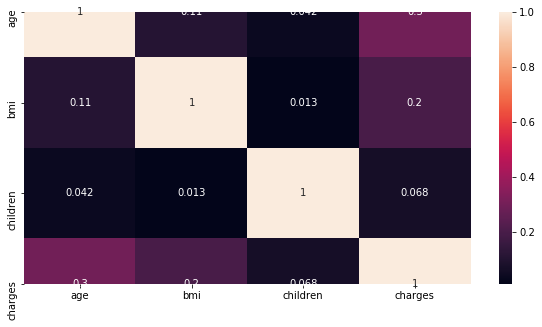

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(c, annot=True)

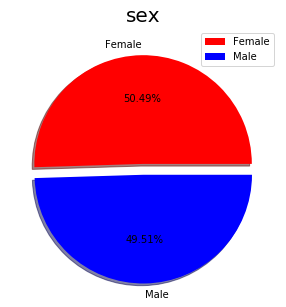

In [14]:
labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('sex', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

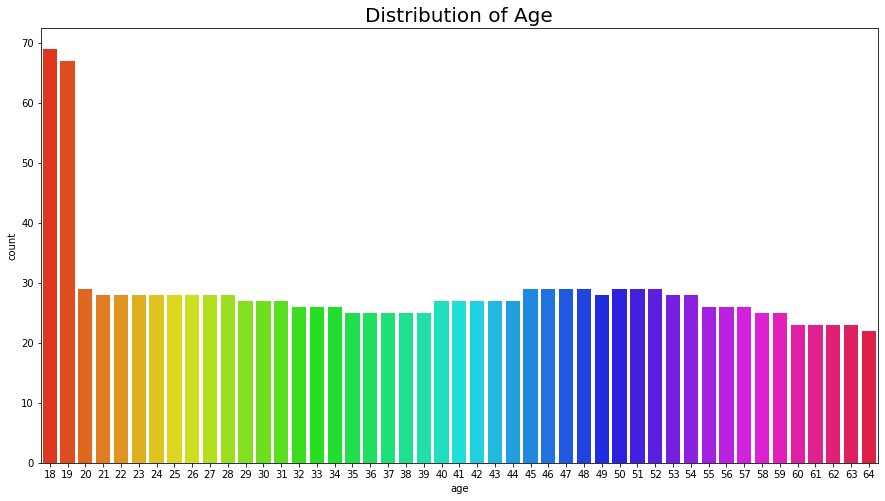

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

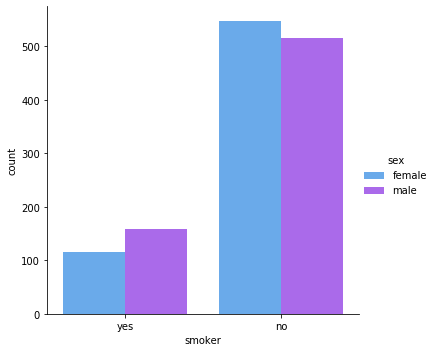

In [16]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="cool", data=df)

D:\anaconda\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


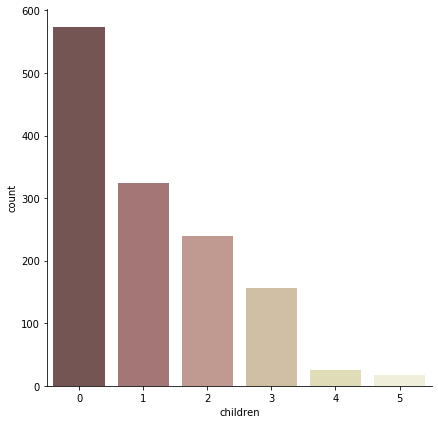

In [17]:
sns.catplot(x="children", kind="count", palette="pink", data=df, size = 6)

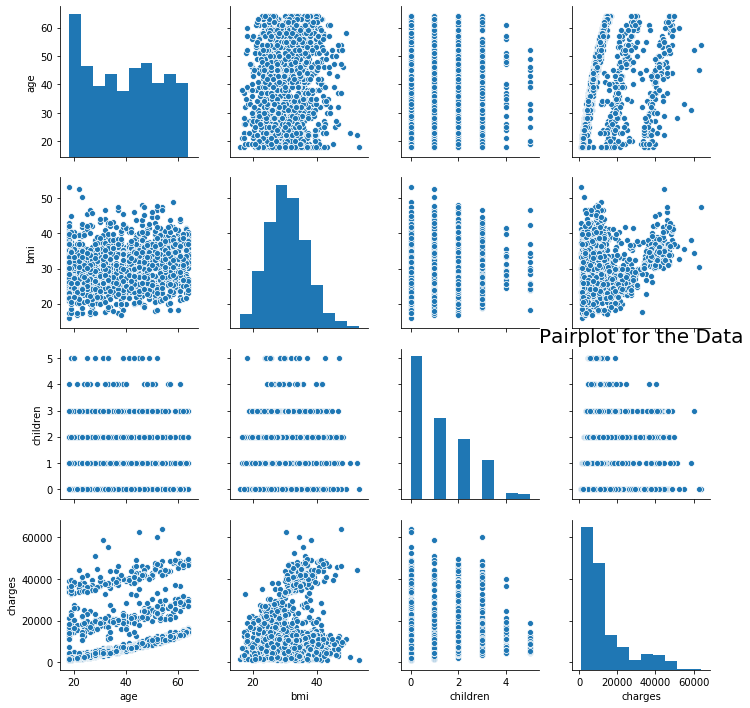

In [18]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

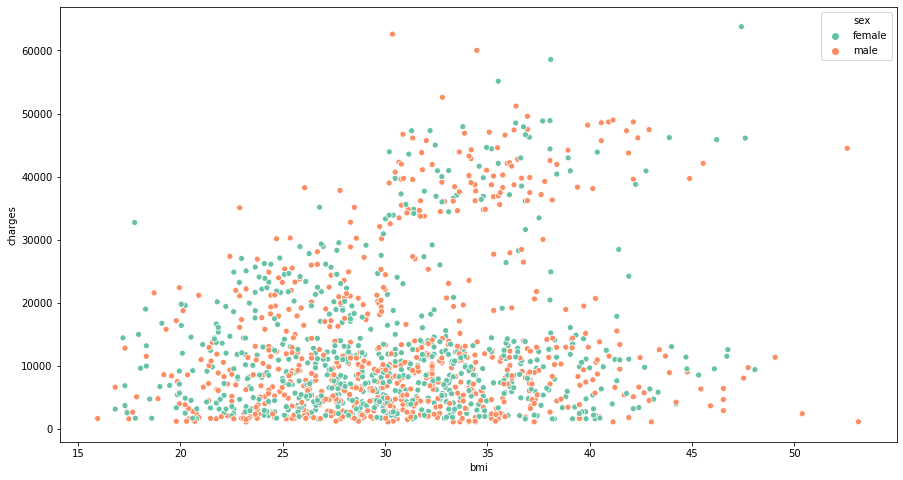

In [19]:
sns.scatterplot(x="bmi", y="charges", data=df, palette='Set2', hue='sex')

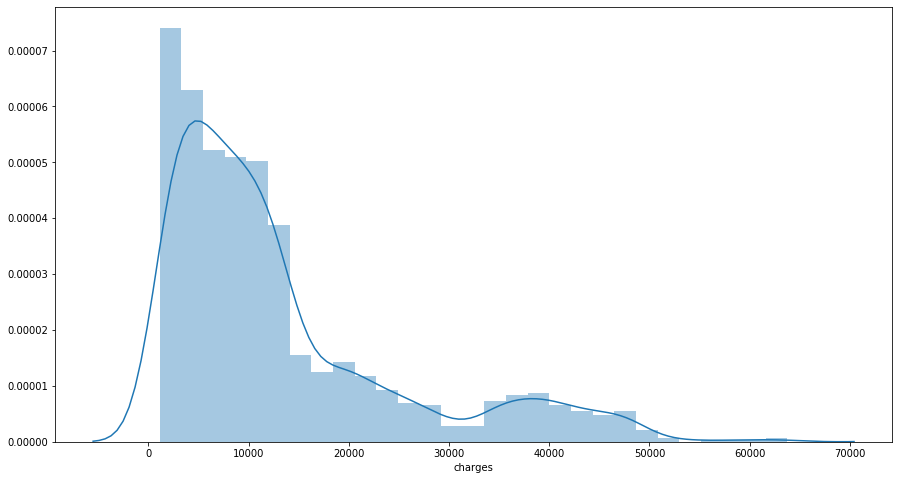

In [20]:
sns.distplot(df['charges'])

### Start Regression

In [21]:
#I will convert sex to 1 if female and 0 if male
df['sex'].replace('female', 1,inplace=True)
df['sex'].replace('male', 0,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
#I will convert smoker to 1 if yes  and 0 if no
df['smoker'].replace('yes', 1,inplace=True)
df['smoker'].replace('no', 0,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
 # create X and y
feature_cols = ['age','sex','bmi','children','smoker'] # a lsit of the predictors
X = df[feature_cols] # subsetting our data to only the predictors
y = df['charges'] # our response variable
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)
print(feature_cols)
print(linreg.coef_)

['age', 'sex', 'bmi', 'children', 'smoker']
[  257.66447661   127.20952698   322.37667307   473.90748038
 23822.3225364 ]


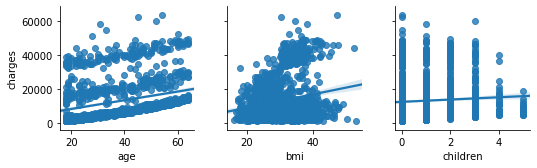

In [25]:
feature_cols = ['age', 'bmi','children',]
# multiple scatter plots, note that we're not including 'sex' and 'smoker', why? because it is catogoricalة
sns.pairplot(df, x_vars=feature_cols, y_vars='charges', kind='reg')

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Pick a new random training and test set

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [27]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4380.204393992072
MSE: 38915975.19586111
RMSE: 6238.26700261067


### using null model 

In [28]:
average_charges = df['charges'].mean()
average_charges

13279.121486655948

In [29]:
num_rows = df.shape[0]
num_rows

1337

In [30]:
null_model_predictions = [average_charges]*num_rows
null_model_predictions

[13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486

In [31]:
print('MAE:', metrics.mean_absolute_error(y, null_model_predictions))
print('MSE:', metrics.mean_squared_error(y, null_model_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, null_model_predictions)))

MAE: 9092.460747560963
MSE: 146551117.05611628
RMSE: 12105.829878868954


So, we are beating the null model 